In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#from sklearn.preprocessing import Imputer
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv files
df=pd.read_csv('abalone.csv',names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Data Exploration (exploratory data analysis or EDA)

In [3]:
df['age'] = df['Rings']+1.5
df = df.drop('Rings', axis = 1)

In [4]:
#Display The head ==> To Check if Data is Properly Imported
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [5]:
#To check the shape of the dataset
df.shape # (rows, columns)

(4177, 9)

In [6]:
#features in data
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [7]:
#checking datatypes
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
age               float64
dtype: object

In [8]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


According to the Infomation:
No-Null data,
1 - Object Type
,7 - Float Type
,1 - Int Type


In [9]:
#Lets describe the abalone dataset
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


According to Described Information:
All Features are not Normally Distributed( Theortically if feature is normally distributed, Mean = Median = Mode ).
,But Features are close to Normality,All numerical, Except Sex

In [10]:
# Are there any missing values?
df.isna().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [11]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [12]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of Sex : 3
number of unique valuse of Length : 134
number of unique valuse of Diameter : 111
number of unique valuse of Height : 51
number of unique valuse of Whole weight : 2429
number of unique valuse of Shucked weight : 1515
number of unique valuse of Viscera weight : 880
number of unique valuse of Shell weight : 926
number of unique valuse of age : 28


# Univariate analysis

In [13]:
#Sex Value Counts in dataset
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [14]:
#Sex percentage in dataset
print('Percentage',df.Sex.value_counts(normalize=True))

Percentage M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64


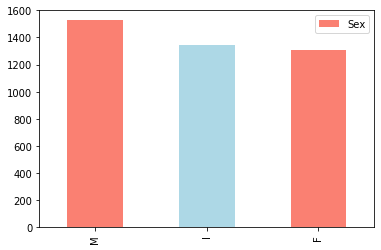

In [15]:
#Lets draw a bar graph for Sex
df["Sex"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.legend()

Length                AxesSubplot(0.125,0.71587;0.352273x0.16413)
Diameter           AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Height               AxesSubplot(0.125,0.518913;0.352273x0.16413)
Whole weight      AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Shucked weight       AxesSubplot(0.125,0.321957;0.352273x0.16413)
Viscera weight    AxesSubplot(0.547727,0.321957;0.352273x0.16413)
Shell weight            AxesSubplot(0.125,0.125;0.352273x0.16413)
age                  AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

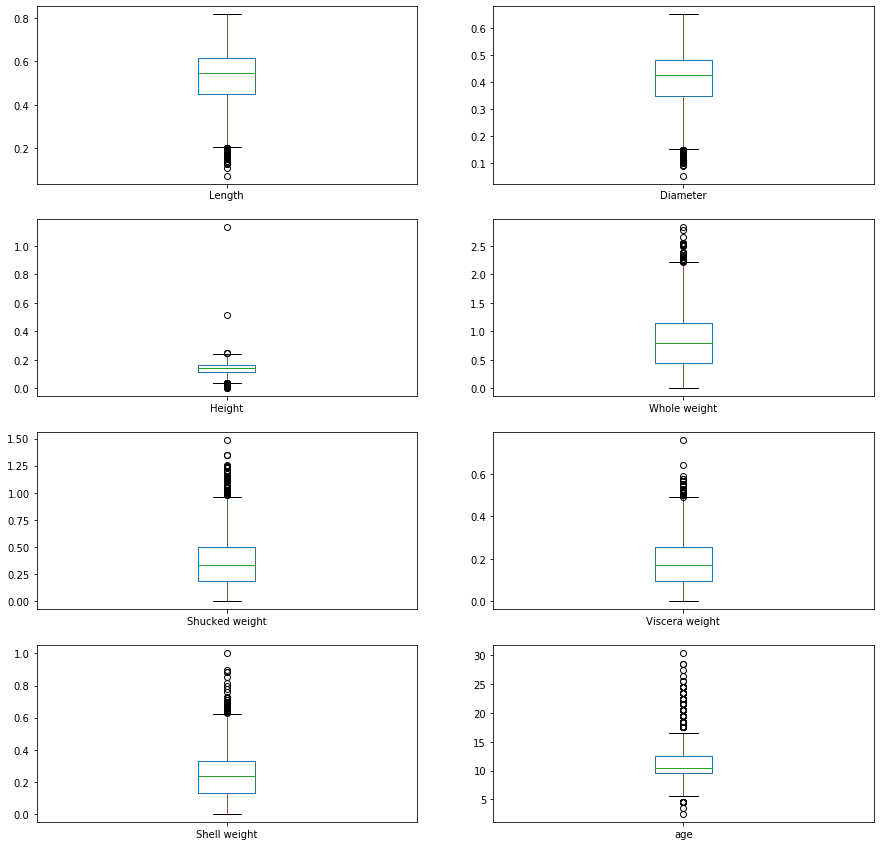

In [16]:
# box plots to visualize outliers
df.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False ,figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002194A0A8448>,
      dtype=object)

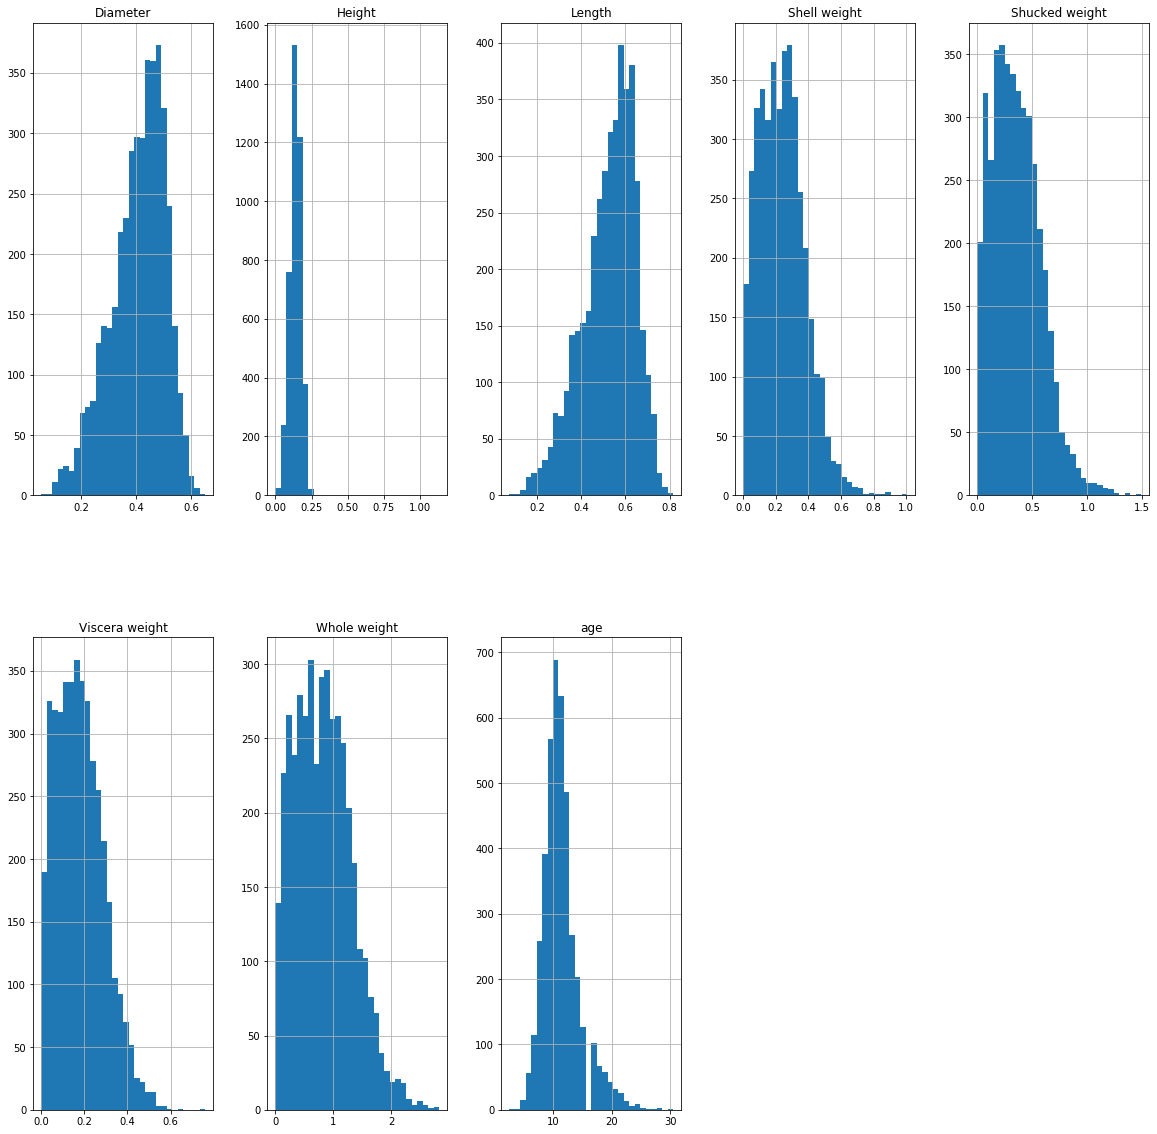

In [17]:
#plotting histograms for checking normal distribution
df.hist(figsize=(20,20),grid=True,layout=(2,5),bins=30)

In [18]:
# using Label Encoding to change the value of gender in binary format
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

# Here Male =2, Female= 0, Infant=1

In [19]:
# Printing the mean values of different fields corresponding to the respective Sex.
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'age']].mean().sort_values(by = 'age',ascending = False)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Sex,,,,,,,,
0,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
2,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
1,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


In [20]:
print("Value Count of Age Column")
print(df.age.value_counts())
print("\nPercentage of Age Column")
print(df.age.value_counts(normalize = True))

Value Count of Age Column
10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
25.5      2
28.5      2
3.5       1
30.5      1
2.5       1
27.5      1
26.5      1
Name: age, dtype: int64

Percentage of Age Column
10.5    0.164951
11.5    0.151784
9.5     0.135983
12.5    0.116591
8.5     0.093608
13.5    0.063921
7.5     0.062006
14.5    0.048599
15.5    0.030165
6.5     0.027532
16.5    0.024659
17.5    0.016040
18.5    0.013886
5.5     0.013646
19.5    0.010055
20.5    0.007661
21.5    0.006225
4.5     0.003591
22.5    0.003352
24.5    0.002155
23.5    0.001436
25.5    0.000479
28.5    0.000479
3.5     0.000239
30.5    0.000239
2.5     0.000239
27.5    0.000239
26.5    0.000239
Name: age, dtype: float64


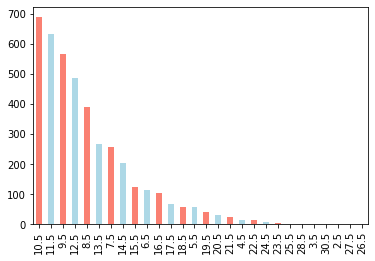

In [21]:
#Lets draw a bar graph Age
df["age"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

# Bivariate analysis

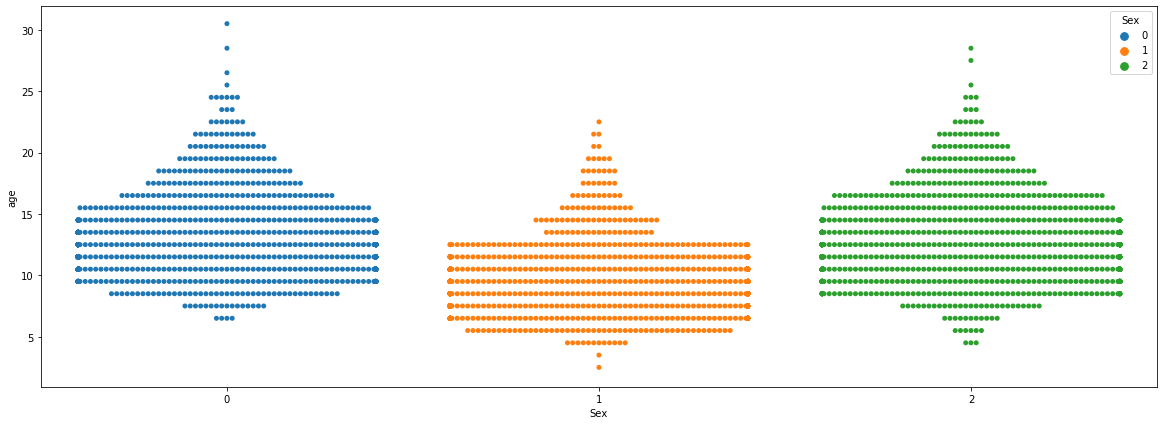

In [22]:
## Here Male =2, Female= 0, Infant=1

plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = df, hue = 'Sex')

According to The above Graph
Female : Majority Between 2.0 to 3.6
Male : Majority Between 1.8 to 3.2
Infant : Majority Between 1.8 to < 3.4

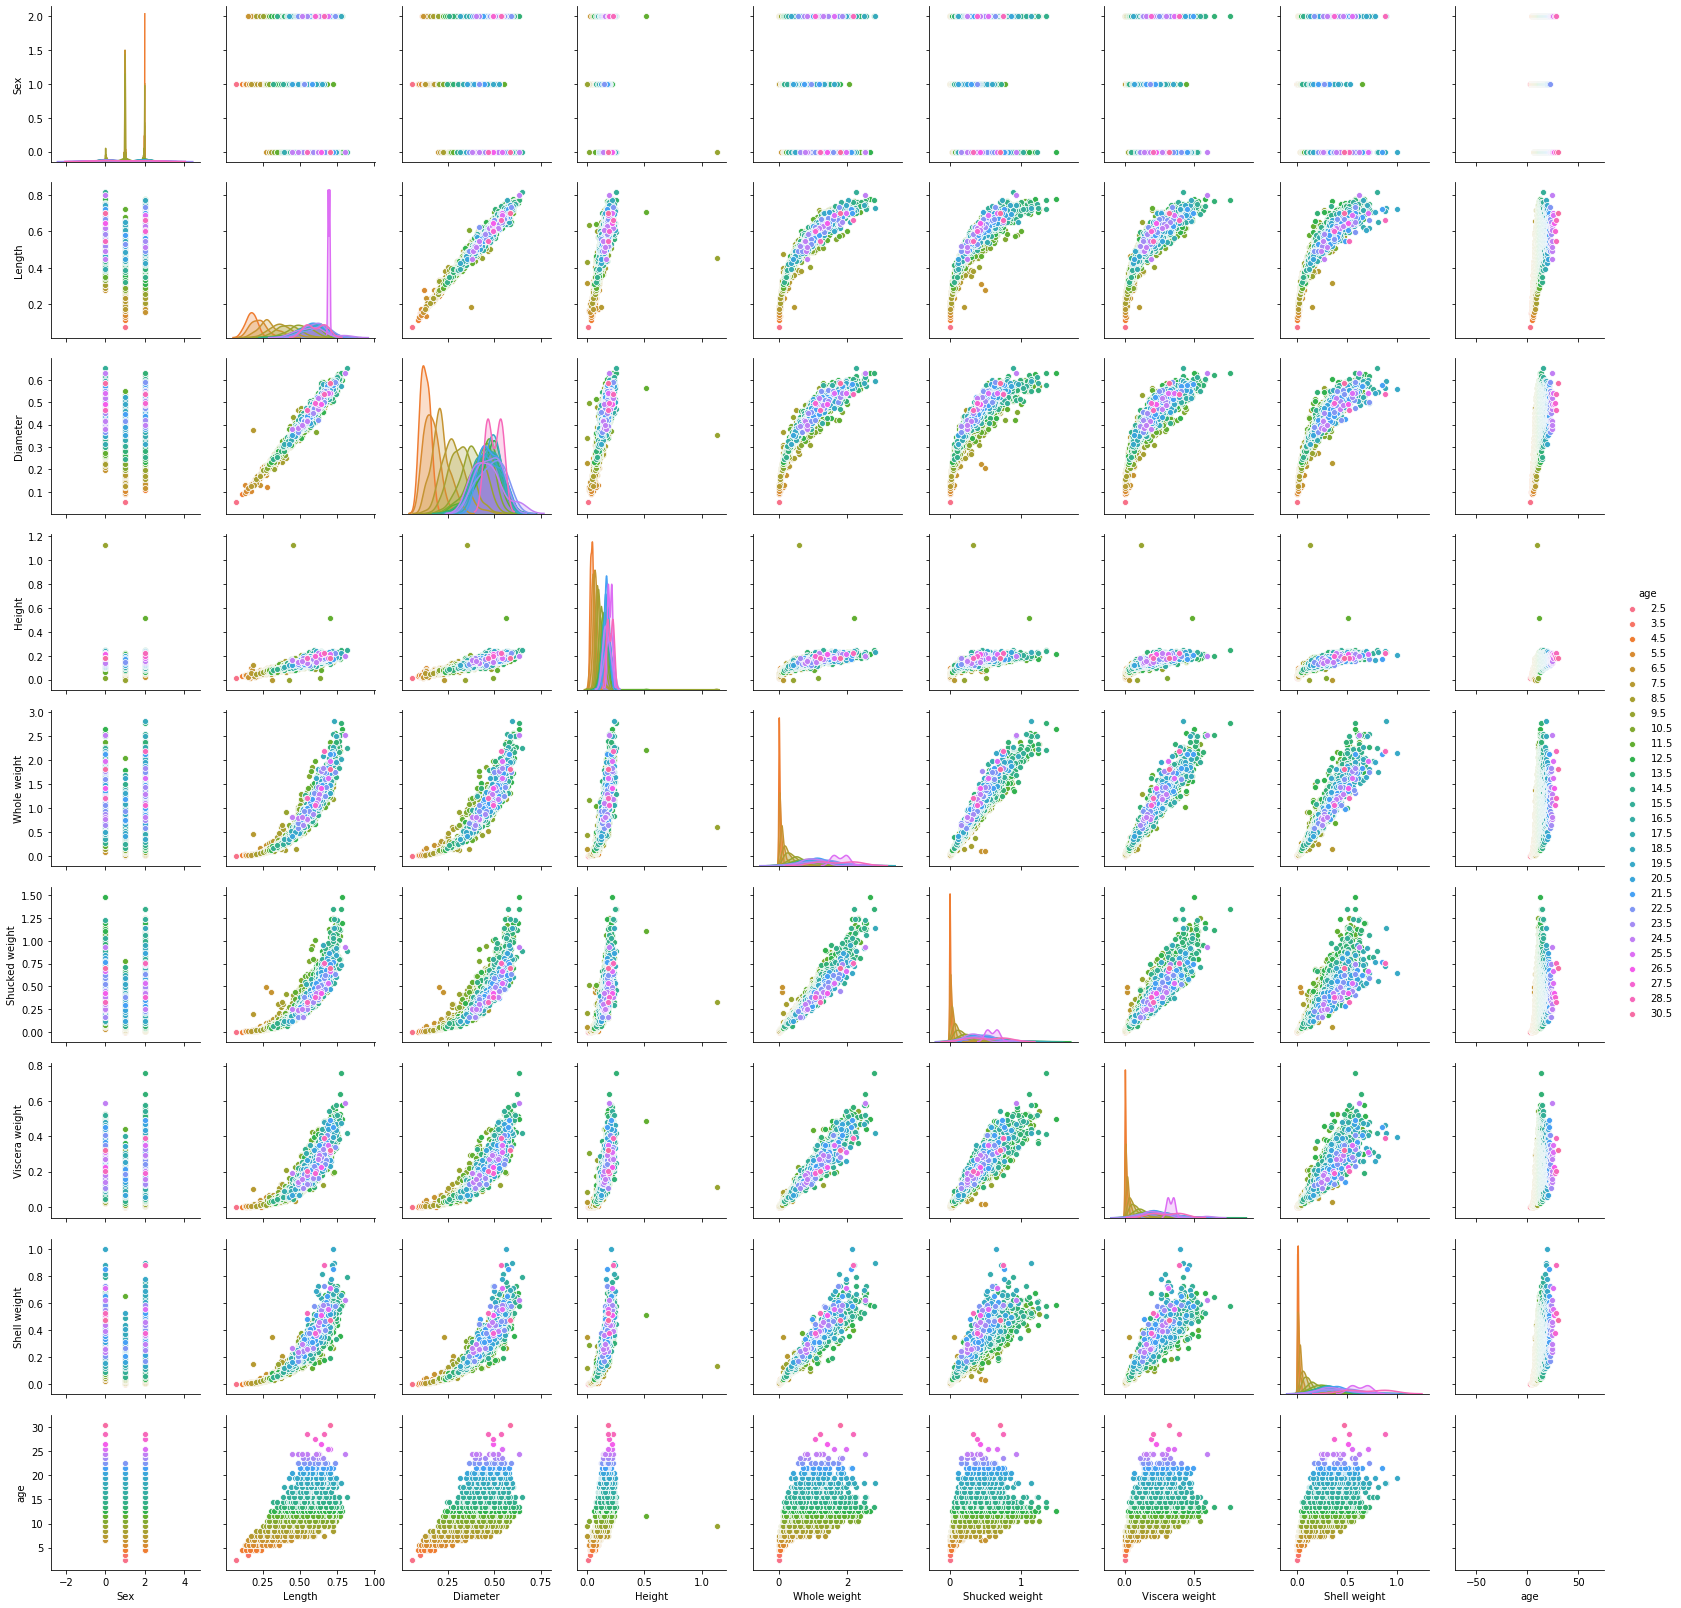

In [23]:
#lets draw pairplot
sns.pairplot(df,hue='age')

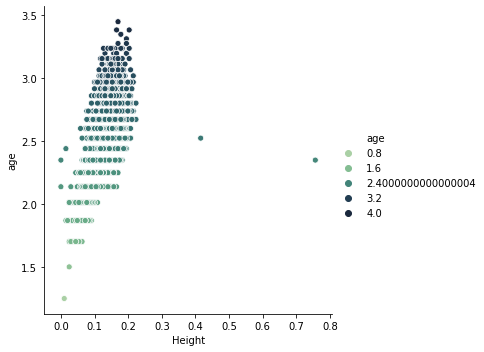

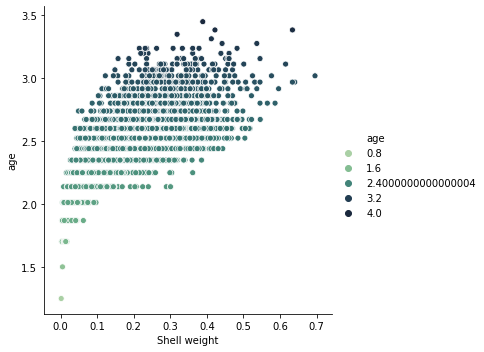

In [84]:
sns.relplot(x="Height", y="age", hue="age", palette="ch:r=-.5,l=.75", data=df);
sns.relplot(x="Shell weight", y="age", hue="age", palette="ch:r=-.5,l=.75", data=df);


(9.0, 0.0)

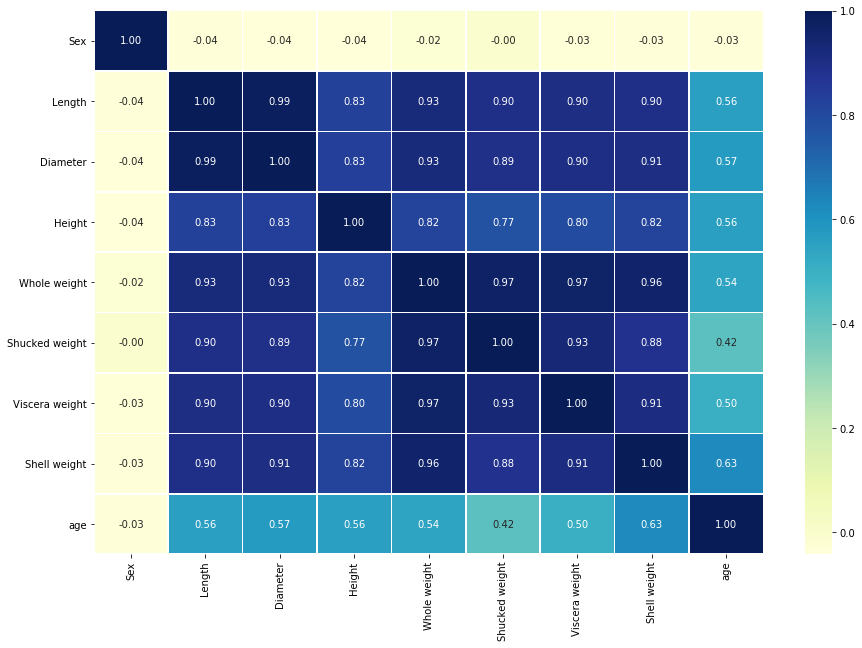

In [24]:
# Plotting Heatmap for Correlation
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [25]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
dtype: float64

In [26]:
#lets remove the skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [27]:
#lets again check the skewness
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            1.099602
Whole weight      0.530959
Shucked weight    0.306439
Viscera weight    0.375637
Shell weight      0.315321
age               0.102513
dtype: float64

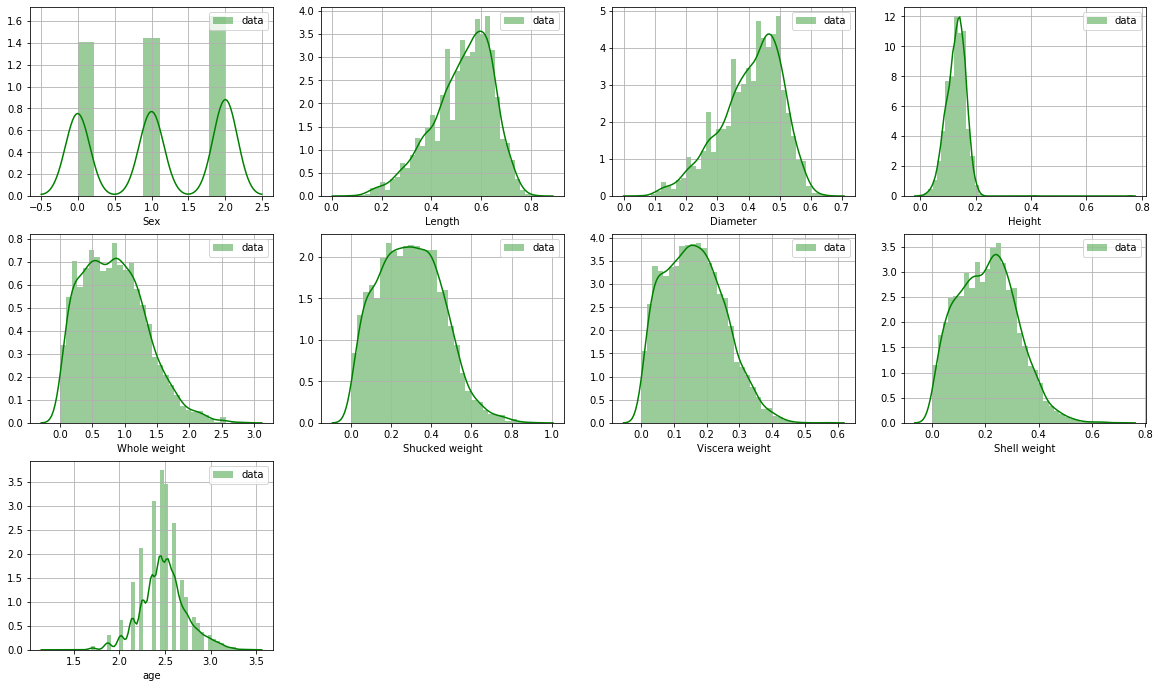

In [28]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_abalone=df.loc[(z<3).all(axis=1)]
print(df_abalone.shape)


(4177, 9)
(4094, 9)


In [30]:
#lets again check the skewness after removing outliers
df_abalone.skew()

Sex              -0.096054
Length           -0.588509
Diameter         -0.569953
Height           -0.279594
Whole weight      0.400590
Shucked weight    0.224642
Viscera weight    0.315753
Shell weight      0.203980
age               0.170801
dtype: float64

# Modeling

In [31]:
# Everything except target variable
X = df_abalone.drop("age", axis=1)

# Target variable
y = df_abalone.age.values

In [32]:
# Independent variables (no target column)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.090754,0.5140,0.202533,0.096219,0.139762
1,2,0.350,0.265,0.086178,0.2255,0.094856,0.047361,0.067659
2,0,0.530,0.420,0.126633,0.6770,0.228330,0.132343,0.190620
3,2,0.440,0.365,0.117783,0.5160,0.195156,0.107957,0.144100
4,1,0.330,0.255,0.076961,0.2050,0.085719,0.038740,0.053541


In [33]:
# Target variable
y


array([2.86220088, 2.2512918 , 2.44234704, ..., 2.44234704, 2.52572864,
       2.67414865])

In [34]:
X.shape

(4094, 8)

In [35]:
y.shape

(4094,)

In [36]:
#scaling the input variable for further evaluation
#linear regression model requires all features to be on common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.153388,-0.600533,-0.450787,-1.198491,-0.652901,-0.586197,-0.730400,-0.629484
1,1.153388,-1.509147,-1.496290,-1.338837,-1.268773,-1.288008,-1.283083,-1.311684
2,-1.279363,0.048478,0.124240,-0.098262,-0.304939,-0.418056,-0.321764,-0.148290
3,1.153388,-0.730335,-0.450787,-0.369641,-0.648632,-0.634279,-0.597617,-0.588436
4,-0.062988,-1.682216,-1.600840,-1.621472,-1.312535,-1.347558,-1.380600,-1.445259
...,...,...,...,...,...,...,...,...
4089,-1.279363,0.351349,0.437891,0.701755,0.143356,0.145603,0.605380,0.151854
4090,1.153388,0.567686,0.333340,-0.098262,0.312000,0.465869,0.379456,0.238570
4091,1.153388,0.654220,0.699266,1.736979,0.760295,0.846334,1.039733,0.588556
4092,-1.279363,0.870557,0.803817,0.304355,0.586314,0.869791,0.804475,0.501353


In [37]:
#lets check again skewness
x.skew()

Sex              -0.096054
Length           -0.588509
Diameter         -0.569953
Height           -0.279594
Whole weight      0.400590
Shucked weight    0.224642
Viscera weight    0.315753
Shell weight      0.203980
dtype: float64

In [38]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [39]:
models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet(),
          "XGBRegressor":XGBRegressor()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.30)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [40]:
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 96 is: 0.6077887291159523
max r2 score corresponding to 62 is: 0.6579575283488585
max r2 score corresponding to 62 is: 0.5896365277367015
max r2 score corresponding to 58 is: 0.33896508808732595
max r2 score corresponding to 79 is: 0.5010092531123469
max r2 score corresponding to 62 is: 0.6363363660294546
max r2 score corresponding to 0 is: 0
max r2 score corresponding to 62 is: 0.5896283579797694
max r2 score corresponding to 0 is: 0
max r2 score corresponding to 58 is: 0.6050689125738281


{'KNeighborsRegressor': 0.608888697145988,
 'SVR': 0.631624963229236,
 'LR': 0.5466211975159458,
 'DecisionTreeRegressor': 1.0,
 'RandomForestRegressor': 0.4574526191434102,
 'GradientBoostingClassifier': 0.6721013022610749,
 'Lasso': 0.0,
 'Ridge': 0.5466107475715176,
 'ElasticNet': 0.0,
 'XGBRegressor': 0.9432238657149713}

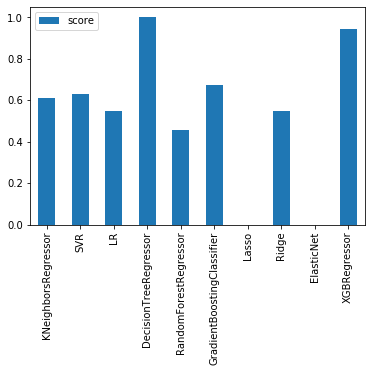

In [41]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [42]:
#           Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGBRegressor=XGBRegressor()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGBRegressor))

Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror*100)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror*100)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror*100)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 79 is: 0.5884621980930117
R2 Score :  0.5884621980930117


Cross_val_score= 0.4806736858826687


Mean absolute error= 0.11353691275180289


Mean squared error= 0.022377454494391897


Root Mean squared error= 0.14959095726143307


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


max r2 score corresponding to 62 is: 0.6579575283488585
R2 Score :  0.6579575283488585


Cross_val_score= 0.5681077127082219


Mean absolute error= 0.10847057313982668


Mean squared error= 0.019922814173144253


Root Mean squared error= 0.14114819932660938


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 62 is: 0.58963652

In [43]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,58.846220,48.067369,11.353691,2.237745,14.959096
1,SVR,65.795753,56.810771,10.847057,1.992281,14.114820
2,LinearRegression,58.963653,47.757340,12.211807,2.390228,15.460362
3,DecisionTreeRegressor,35.139075,7.565611,15.111139,3.970092,19.925089
4,RandomForestRegressor,59.802170,48.649225,11.978857,2.341387,15.301592
5,GradientBoostingRegressor,63.619904,54.068201,11.246789,2.119017,14.556844
6,AdaBoostRegressor,52.082121,32.699448,13.676770,2.829778,16.821945
7,Lasso,-0.000743,-15.485750,18.051729,5.401407,23.240928
8,Ridge,58.962836,47.764343,12.211655,2.390276,15.460516
9,ElasticNet,-0.000743,-15.485750,18.051729,5.401407,23.240928


In [44]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

In [45]:
#for getting best set of parameters for DecisionTreeRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridD = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

clfD = DecisionTreeRegressor()

# Setup GridSearchCV
gs_clfD = GridSearchCV(estimator=clfD,
                      param_grid=gridD,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clfD.fit(x, y);

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=2, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=2, min_samples_split=3 ...........................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ max_leaf_nodes=4, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=4, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=4, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=4, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=4, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=4, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=4, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=4, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=4, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=4, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=4, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=4, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=4, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=4, min_samples_split=3 ...........................
[CV] .

[CV] ............ max_leaf_nodes=8, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=8, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=2 ...........................
[CV] ............ max_leaf_nodes=8, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=8, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=8, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=8, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=3 ...........................
[CV] ............ max_leaf_nodes=8, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=3 ...........................
[CV] .

[CV] ........... max_leaf_nodes=13, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=13, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=13, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=13, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=13, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=13, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=13, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=17, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=17, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=17, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=18, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=18, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=18, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=18, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=18, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=18, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=22, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=22, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=22, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=22, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=26, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=26, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=27, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=27, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=27, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=27, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=27, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=31, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=31, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=31, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=35, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=35, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=35, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=39, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=39, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=39, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=39, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=39, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=39, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=39, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=40, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=40, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=40, min_samples_split=2 ..........................
[CV] .

[CV] ........... max_leaf_nodes=43, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=43, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=43, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=43, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=43, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=43, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=43, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=44, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=44, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=44, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=44, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=44, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=44, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=44, min_samples_split=2 ..........................
[CV] .

[CV] ........... max_leaf_nodes=47, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=48, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=48, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=52, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=52, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=52, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=52, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=56, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=56, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=56, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=56, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=56, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=56, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=56, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=56, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=60, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=60, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=60, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=60, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=60, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=60, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=60, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=60, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=60, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=60, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=60, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=60, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=60, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=60, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=64, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=64, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=64, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=68, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=68, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=68, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=68, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=68, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=68, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=68, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=68, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=68, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=68, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=68, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=72, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=72, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=76, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=76, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=76, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=76, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=76, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=76, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=76, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=76, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=76, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=76, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=76, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=76, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=76, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=80, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=80, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=80, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=80, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=80, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=80, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=80, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=80, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=84, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=84, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=84, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=84, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=84, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=84, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=84, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=84, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=84, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=84, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=84, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=84, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=84, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=84, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=88, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=88, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=88, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=88, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=88, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=88, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=88, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=88, min_samples_split=4 ..........................
[CV] .

[CV] ........... max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=93, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=93, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=93, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=93, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=93, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=93, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=93, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=93, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=93, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=93, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=93, min_samples_split=3 ..........................
[CV] .

[CV] ........... max_leaf_nodes=97, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=97, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=97, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=2 ..........................
[CV] ........... max_leaf_nodes=97, min_samples_split=2, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=97, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=97, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=97, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=3 ..........................
[CV] .

[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:   13.4s finished


In [46]:
# best parameters for DecisionTreeRegressor
print("Best parameter:",gs_clfD.best_params_)
print("score:",gs_clfD.best_score_)

Best parameter: {'max_leaf_nodes': 48, 'min_samples_split': 2}
score: 0.46417966829632573


In [47]:
#checking r2 score using best parameters which calculated from gridsearchCV
dtc=DecisionTreeRegressor(max_leaf_nodes=48, min_samples_split= 3)
max_random_score(dtc)

max r2 score corresponding to 58 is: 0.5840379701529763


58

In [48]:
#for getting best set of parameters for DecisionTreeRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid1 = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}

clfD = GradientBoostingRegressor()

# Setup GridSearchCV
gs_clf1 = GridSearchCV(estimator=clfD,
                      param_grid=grid1,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clf1.fit(x, y);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.0s
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.0s
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.0s
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.0s
[CV] learning_rate=0.001, n_estimators=10 ............................
[CV] ............. learning_rate=0.001, n_estimators=10, total=   0.0s
[CV] learning_rate=0.001, n_estimators=100 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ learning_rate=0.001, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, n_estimators=100 ...........................
[CV] ............ learning_rate=0.001, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, n_estimators=100 ...........................
[CV] ............ learning_rate=0.001, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, n_estimators=100 ...........................
[CV] ............ learning_rate=0.001, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, n_estimators=100 ...........................
[CV] ............ learning_rate=0.001, n_estimators=100, total=   0.1s
[CV] learning_rate=0.001, n_estimators=500 ...........................
[CV] ............ learning_rate=0.001, n_estimators=500, total=   0.6s
[CV] learning_rate=0.001, n_estimators=500 ...........................
[CV] ............ learning_rate=0.001, n_estimators=500, total=   0.6s
[CV] learning_rate=0.001, n_estimators=500 ...........................
[CV] .

[CV] ................ learning_rate=1, n_estimators=100, total=   0.1s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=   0.1s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=   0.1s
[CV] learning_rate=1, n_estimators=100 ...............................
[CV] ................ learning_rate=1, n_estimators=100, total=   0.1s
[CV] learning_rate=1, n_estimators=500 ...............................
[CV] ................ learning_rate=1, n_estimators=500, total=   0.6s
[CV] learning_rate=1, n_estimators=500 ...............................
[CV] ................ learning_rate=1, n_estimators=500, total=   0.5s
[CV] learning_rate=1, n_estimators=500 ...............................
[CV] ................ learning_rate=1, n_estimators=500, total=   0.5s
[CV] learning_rate=1, n_estimators=500 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   36.9s finished


In [49]:
# best parameters for GradientBoostingRegressor
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'learning_rate': 0.1, 'n_estimators': 100}
score: 0.5410236930602069


In [50]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.1, n_estimators= 100)
max_random_score(gbr)

max r2 score corresponding to 62 is: 0.6369526314732028


62

In [51]:
#for getting best set of parameters for SVR we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid2 = { 'gamma': [1e-3, 1e-4,1e-5],
                     'C': [1, 10, 100, 1000],
         }
clfD = SVR()

# Setup GridSearchCV
gs_clf2 = GridSearchCV(estimator=clfD,
                      param_grid=grid2,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clf2.fit(x, y);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.2s
[CV] C=1, gamma=0.001 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................. C=1, gamma=0.001, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .

[CV] .............................. C=1000, gamma=1e-05, total=   0.2s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   14.2s finished


In [52]:
# best parameters for SVR
print("Best parameter:",gs_clf2.best_params_)
print("score:",gs_clf2.best_score_)

Best parameter: {'C': 1000, 'gamma': 0.001}
score: 0.5505806406757463


In [53]:
#checking r2 score using best parameters which calculated from gridsearchCV
svr=SVR(C=1000, gamma= 0.001)
max_random_score(svr)

max r2 score corresponding to 62 is: 0.6451782155594897


62

In [54]:
#for getting best set of parameters for KNeighborsRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid3 = {'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
clfD = KNeighborsRegressor()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clfD,
                      param_grid=grid3,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clf3.fit(x, y);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=distance ..............
[CV]  

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.9s finished


In [55]:
# best parameters for KNeighborsRegressor
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
score: 0.5168310599181807


In [56]:
#checking accuracy score using best parameters which calculated from gridsearchCV
knn=KNeighborsRegressor(metric='euclidean', n_neighbors= 11, weights= 'distance')
max_random_score(knn)

max r2 score corresponding to 62 is: 0.6105504300218315


62

In [57]:
#for getting best set of parameters for KNeighborsRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid3 = {'n_neighbors':[3,5,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
clfD = KNeighborsRegressor()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clfD,
                      param_grid=grid3,
                      cv=5, # 3-fold cross-validation
                      verbose=2) # print out progress

# Fit the GridSearchCV
gs_clf3.fit(x, y);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................
[CV] . metric=euclidean, n_neighbors=3, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=5, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=5, weights=distance, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  metric=euclidean, n_neighbors=11, weights=uniform, total=   0.0s
[CV] metric=euclidean, n_neighbors=11, weights=uniform ...............
[CV]  

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


In [61]:
#for getting best set of parameters for ridge we will use grid searchCV
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(x, y)
print('Best Params: ', grid_result.best_params_)
print("score:",grid_result.best_score_)


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best Params:  {'alpha': 1}
score: 0.540253606371524


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    2.8s finished


In [62]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rc=Ridge(alpha= 1)
max_random_score(rc)

max r2 score corresponding to 62 is: 0.5896283579797694


62

In [63]:
#lets use gridsearchcv to find out best parameters for RandomForestRegressor
grid5 = {'n_estimators': [100, 500, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_clf5 = GridSearchCV(estimator=clf,
                      param_grid=grid5,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf5.fit(x, y);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   4.7s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   9.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   8.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   8.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   8.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   8.4s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   3.0s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   1.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   1.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   3.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   3.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   3.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.4s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   3.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   3.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   6.5s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   6.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1000, total=   6.7s
[CV] max_depth=10, max_features=auto, min_samp

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   1.2s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.3s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000, total=   2.3s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 14.0min finished


In [64]:
# best parameters for RandomForestRegressor
print("Best parameter:",gs_clf5.best_params_)
print("score:",gs_clf5.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 500}
score: 0.5414976268483498


In [74]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestRegressor(n_estimators=500,max_depth=None, min_samples_leaf= 2, max_features= 'sqrt',min_samples_split=6)
max_random_score(rf)

max r2 score corresponding to 62 is: 0.6409532526612232


62

In [66]:
#using AdaBoostClassifier base_estimator as RandomForestRegressor
rm = RandomForestRegressor(n_estimators=1500, random_state=62)
ada_rm=AdaBoostRegressor(base_estimator=rm,learning_rate=0.01,n_estimators=10)
ada_rm.fit(x_train, y_train)
y_predrad = ada_rm.predict(x_test)
evaluate_preds(y_test,y_predrad)


r2score: 62.00%
Mean absolute error: 0.12
Mean squared error: 0.02
Root Mean squared error: 0.15


{'r2score': 0.62,
 'Mean absolute error': 0.12,
 'Mean squared error': 0.02,
 'Root Mean squared error': 0.15}

In [67]:
#using AdaBoostClassifier base_estimator as svr

random_state=62
svr=SVR(C=1000, gamma= 0.001)
ada_reg=AdaBoostRegressor(base_estimator=svr)
ada_reg.fit(x_train, y_train)
y_predad = ada_reg.predict(x_test)
evaluate_preds(y_test,y_predad)


r2score: 59.57%
Mean absolute error: 0.12
Mean squared error: 0.02
Root Mean squared error: 0.16


{'r2score': 0.6,
 'Mean absolute error': 0.12,
 'Mean squared error': 0.02,
 'Root Mean squared error': 0.16}

# After all this process conclusion is that SVR is performing well.


In [68]:
#lets make our final model
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.3,random_state=62)
svr=SVR(kernel='rbf')
svr.fit(x_train, y_train)
y_predsvr = svr.predict(x_test)
evaluate_preds(y_test,y_predsvr)


r2score: 65.80%
Mean absolute error: 0.11
Mean squared error: 0.02
Root Mean squared error: 0.14


{'r2score': 0.66,
 'Mean absolute error': 0.11,
 'Mean squared error': 0.02,
 'Root Mean squared error': 0.14}

Mean squared error is 0.02 it means our model performed well

In [69]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predsvr})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
0,2.251292,2.217850
1,2.351375,2.407343
2,2.442347,2.395727
3,2.602690,2.739405
4,2.602690,2.594931
...,...,...
1224,2.674149,2.638450
1225,2.251292,2.040159
1226,2.014903,2.114395
1227,2.525729,2.479509


In [70]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(y_predsvr)
df1.to_csv('Project_3_abalone_submission.csv')

In [71]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(svr,'Project_3_abalone_submission.pkl')

['Project_3_abalone_submission.pkl']

In [72]:
 svr_from_joblib=joblib.load('Project_3_abalone_submission.pkl')
joblib_y_preds = svr_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

r2score: 65.80%
Mean absolute error: 0.11
Mean squared error: 0.02
Root Mean squared error: 0.14


{'r2score': 0.66,
 'Mean absolute error': 0.11,
 'Mean squared error': 0.02,
 'Root Mean squared error': 0.14}